In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
data = pd.read_csv('C:\Sharath\DATA SETS\REGRESSION\SIMPLE LINEAR\\auto_insurance_payment.csv')

<AxesSubplot:>

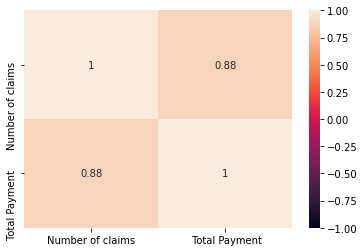

In [3]:
#Checking correlation between variables
data.corr()
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1)

In [4]:
#Assingning respective variables
x = data.iloc[:,0:1]
y = data.iloc[:,-1:]

In [5]:
#Split the data for training and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [6]:
#Build the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)

LinearRegression()

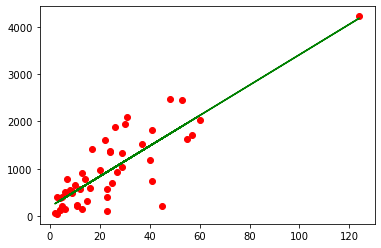

In [7]:
#Plot the LOBF 
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,lin_reg.predict(xtrain),color='green')

In [8]:
#Predictions
ypred = lin_reg.predict(xtest)

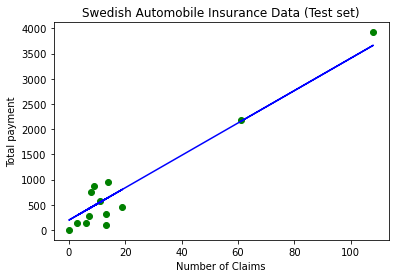

In [9]:
#Visualise test set result
plt.scatter(xtest, ytest, color = 'green')
plt.plot(xtest,lin_reg.predict(xtest), color = 'blue')
plt.title('Swedish Automobile Insurance Data (Test set)')
plt.xlabel('Number of Claims')
plt.ylabel('Total payment')
plt.show()

In [10]:
#Unseen data
unseen = lin_reg.predict(np.array([[108]]))
print(unseen)

[[3666.38356777]]


In [11]:
#Metrics evaluation
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print('\n R2 value \n',r2_score(ytest,ypred))
print('\n MSE \n',mean_squared_error(ytest,ypred))
print('\n Ex var_Scr',explained_variance_score(ytest,ypred))


 R2 value 
 0.9284723758722918

 MSE 
 79044.58911940284

 Ex var_Scr 0.930288922295053


# Polynomial Based LR

In [22]:
#Data
x = np.array([10,15,20,25,30,35,40,45,50,55,60,65])
y = np.array([2000,3500,5000,7500,10000,12000,10000,8000,6500,10000,16000,20000])
Age = pd.Series(x)
Claims = pd.Series(y)
data = pd.DataFrame({'Age':Age,'Claims per policy':Claims})
x = data.iloc[:,0:1]
y = data.iloc[:,-1:]
data.head()

,Age,Claims per policy
0,10,2000
1,15,3500
2,20,5000
3,25,7500
4,30,10000


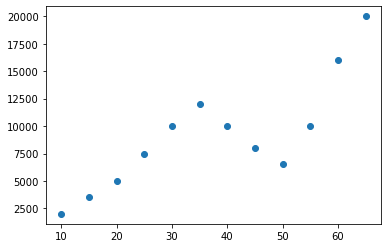

In [23]:
plt.scatter(x,y)

In [24]:
#Build the model LR
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

Text(0, 0.5, 'Claims per policy')

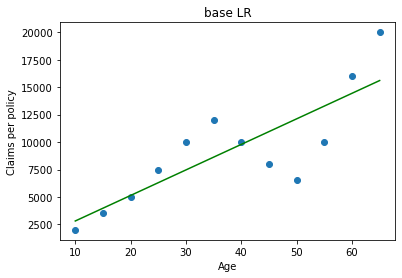

In [25]:
#Plot
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color='green')
plt.title('base LR')
plt.xlabel('Age')
plt.ylabel('Claims per policy')

In [26]:
#Polynomial based LR
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)

LinearRegression()

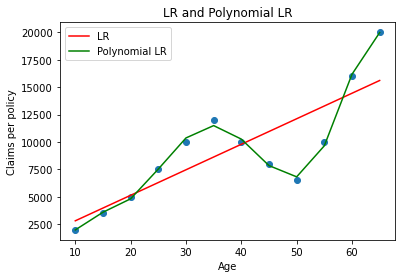

In [28]:
#PLot
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color='red',label='LR')
plt.plot(x,poly_reg.predict(x_poly),color='green',label='Polynomial LR')
plt.title('LR and Polynomial LR')
plt.xlabel('Age')
plt.ylabel('Claims per policy')
plt.legend()

In [60]:
data.head()

,Age,Claims per policy
0,10,2000
1,15,3500
2,20,5000
3,25,7500
4,30,10000


In [38]:
#Unseen data predictions
lin_regg = lin_reg.predict(np.array([[10]]))
poly_regg = poly_reg.predict(poly.fit_transform(np.array([[10]])))
print("Original Value:",data['Claims per policy'][0]);print()
print("Linear Regression:",lin_regg[0,0]);print();print("Polynomial LR:",poly_regg[0,0])

Original Value: 2000

Linear Regression: 2814.102564102567

Polynomial LR: 1983.641166530033
